### Colormaps

A <b>Colormap</b> maps values between 0 and 1 to colors. Colormaps come in two flavors:
- <b>ListedColormap</b> - best for a discrete color mapping
- <b>LinearSegmentedColormap</b> - best for a continuous color mapping

### ListedColormap

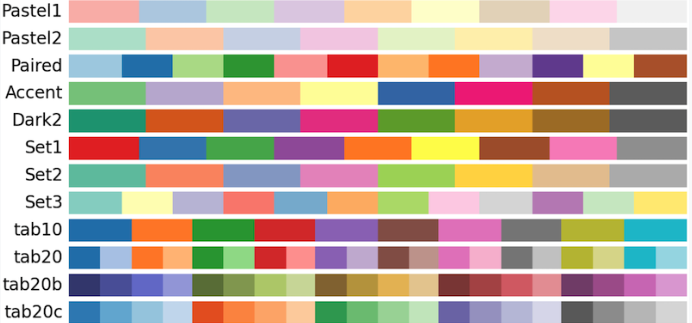

As an example, Dark2 is a ListedColormap with 8 distinct colors.



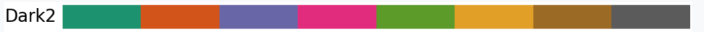


We can fetch the colormap using the `matplotlib.colormaps` registry ( or `pyplot.colormaps`). For example,

In [19]:
import matplotlib as plt

# Get the Colormap
cmap = plt.colormaps["Dark2"]

# Check its type
type(cmap)

matplotlib.colors.ListedColormap

We can inspect its colors via the `.colors` attribute.

In [20]:
# Inspect the colors (RGB tuples)

cmap.colors

((0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4))

When we make a scatter plot, we can use `cmap=plt.colormaps["Dark2"]` to apply the Dark2 Colormap.

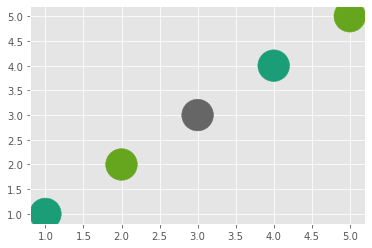

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(
    x=[1,2,3,4,5], 
    y=[1,2,3,4,5], 
    c=[0,1,2,0,1], 
    cmap=plt.colormaps["Dark2"], 
    s=1000
);

How it works

- The `c` values are normalized to range [0, 1] using the default formula  
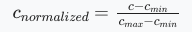
- The normalized `c` values are then mapped to colors using the chosen color map.

In the example above, the `c=[0,1,2,0,1]` is normalized into `cnorm = [0., 0.5, 1., 0., 0.5]`. Those normalized values map to the following colors:

In [22]:
# Get the Colormap
cmap = plt.colormaps["Dark2"]
print(cmap([0., 0.5, 1., 0., 0.5]))

[[0.10588235 0.61960784 0.46666667 1.        ]
 [0.4        0.65098039 0.11764706 1.        ]
 [0.4        0.4        0.4        1.        ]
 [0.10588235 0.61960784 0.46666667 1.        ]
 [0.4        0.65098039 0.11764706 1.        ]]


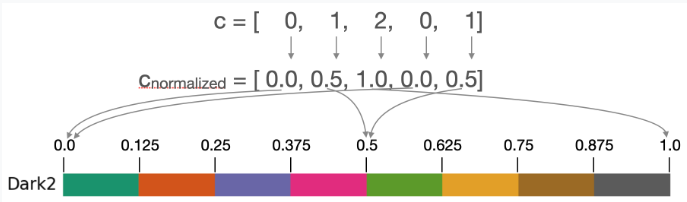

### LinearSegmentedColormap

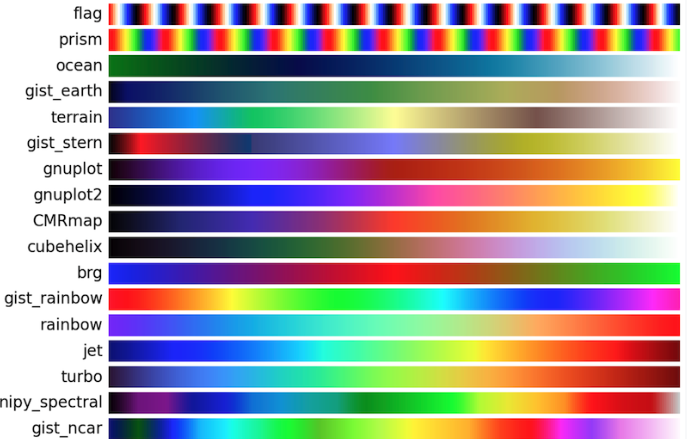

LinearSegmentedColormaps behave much like ListedColormaps, except they don't have a `.colors` attribute. For example, consider the LinearSegmentedColormap rainbow.

In [23]:
# Get the Colormap
cmap = plt.colormaps["rainbow"]

# Check its type
type(cmap) # <class 'matplotlib.colors.LinearSegmentedColormap'>

# Inspect the colors (RGB tuples)
cmap.colors

AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

We can use `cmap=plt.colormaps["rainbow"]` to apply the rainbow Colormap to a scatter plot.

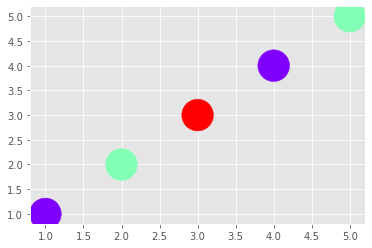

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(
    x=[1,2,3,4,5], 
    y=[1,2,3,4,5], 
    c=[0,1,2,0,1], 
    cmap=plt.colormaps["rainbow"], 
    s=1000
)

How it works

- The `c` values are normalized to range [0, 1] using the default formula 

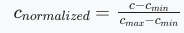
- The normalized `c` values are then mapped to colors using the chosen color map.

In the example above, the `c=[0,1,2,0,1]` is normalized into `cnorm = [0., 0.5, 1., 0., 0.5]`. Those normalized values map to the following colors:

In [25]:
# Get the Colormap
cmap = plt.colormaps["rainbow"]
print(cmap([0., 0.5, 1., 0., 0.5]))


[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]
 [5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]]


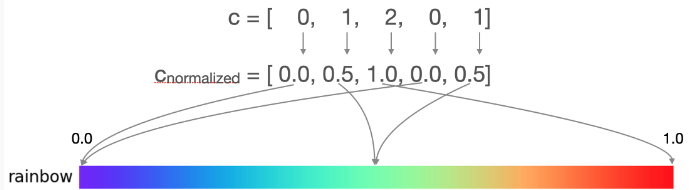

# <b> Iris Problem </b>

The [Iris Flower Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) contains measurements on three species of iris flower

In [26]:
import pandas as pd

# Fetch the data 
iris = pd.read_csv('Data/iris/iris.csv')

# Inspect the first 5 rows
iris.head()
#    sepal_length  sepal_width  petal_length  petal_width      species
# 0           5.1          3.5           1.4          0.2  Iris-setosa
# 1           4.9          3.0           1.4          0.2  Iris-setosa
# 2           4.7          3.2           1.3          0.2  Iris-setosa
# 3           4.6          3.1           1.5          0.2  Iris-setosa
# 4           5.0          3.6           1.4          0.2  Iris-setosa

# Inspect the last 5 rows
iris.tail()
#      sepal_length  sepal_width  petal_length  petal_width         species
# 145           6.7          3.0           5.2          2.3  Iris-virginica
# 146           6.3          2.5           5.0          1.9  Iris-virginica
# 147           6.5          3.0           5.2          2.0  Iris-virginica
# 148           6.2          3.4           5.4          2.3  Iris-virginica
# 149           5.9          3.0           5.1          1.8  Iris-virginica

# Inspect the species values
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

Suppose we want to build a model to predict petal_length. It'd be useful to visualize petal_length versus the other three continuous variables: sepal_length, sepal_width, and petal_width, each colored by species. Do that, mimicking the plot below.

Notes

- the plot style used in this example is [ggplot](https://matplotlib.org/3.5.1/gallery/style_sheets/ggplot.html).
- the Colormap used in this example is [brg](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html#miscellaneous).

The answer as a graph should like this:

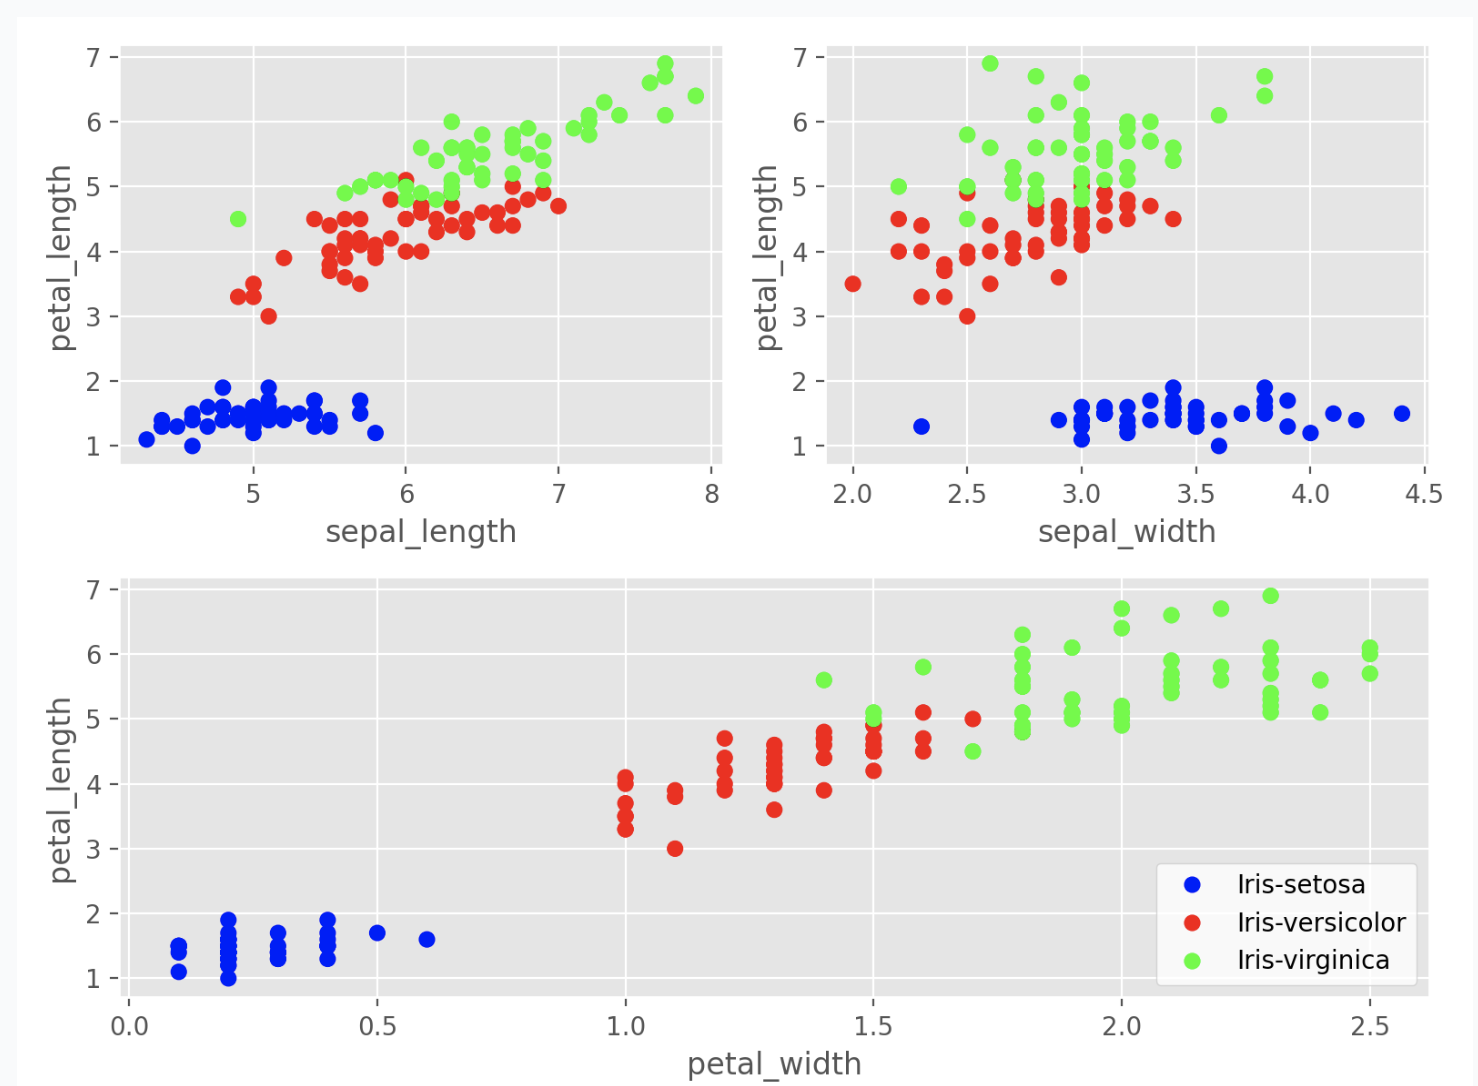

1. Specify ggplot as a grahic style

In [27]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('ggplot')

2. Instantiate figure object

In [28]:
fig = plt.figure(layout='tight')

<Figure size 432x288 with 0 Axes>

3. Generate axes through gridpec

In [29]:
gs = gridspec.GridSpec(2,2)

In [30]:
type(gs)
gs.get_geometry()

(2, 2)

In [31]:
gs[0, 0]
gs[-1, -1]
gs[:, 0]
gs[0, :]

GridSpec(2, 2)[0:1, 0:2]

In [32]:
type(gs[0, 0])

matplotlib.gridspec.SubplotSpec

In [33]:
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs[1, :], sharey=ax1)

ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')

Text(0.5, 1.0, 'ax3')

4. Plot petal_length vs sepal_length through scatter

In [39]:
import matplotlib.cm
colors = pd.Categorical(iris.species)

ax1.scatter(
    x=iris[["sepal_length"]],
    y=iris[["petal_length"]],
    c=colors.codes, 
    cmap=plt.cm.get_cmap("brg")
)

ax1.set_xlabel('sepal_length')
ax1.set_ylabel('petal_length')

Text(0, 0.5, 'petal_length')

In [40]:
colors = pd.Categorical(iris.species)
colors

['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', ..., 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica']
Length: 150
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

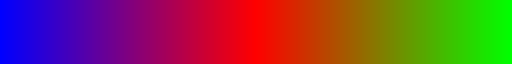

In [41]:
plt.cm.get_cmap("brg")

5. Plot petal_length vs sepal_width and petal_width through scatter

In [47]:
ax2.scatter(
    x=iris[['sepal_width']],
    y=iris[['petal_length']],
    c=colors.codes,
    cmap=plt.colormaps['brg']
)
ax2.set_xlabel('sepal_width')
ax2.set_ylabel('petal_length')


artist3 = ax3.scatter(
    x=iris[['petal_width']],
    y=iris[['petal_length']],
    c=colors.codes,
    cmap=plt.colormaps['brg']
)
ax3.set_xlabel('petal_width')
ax3.set_ylabel('petal_length')

Text(0, 0.5, 'petal_length')

6. Add a legend

In [49]:
fig.legend(
    handles=artist3.legend_elements()[0],
    labels=colors.categories.to_list(),
    loc='lower right',
    bbox_to_anchor=(1,0),
    bbox_transform=ax3.transAxes,
    facecolor='white'
)

In [50]:
artist3.legend_elements()

([<matplotlib.lines.Line2D at 0x15d4dce80>,
 ['$\\mathdefault{0}$', '$\\mathdefault{1}$', '$\\mathdefault{2}$'])

7. Add everything

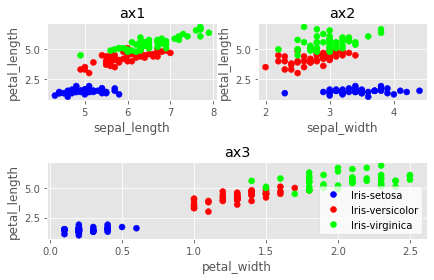

In [52]:
plt.style.use('ggplot')

fig = plt.figure(layout='tight')

gs = gridspec.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharey=ax1)
ax3 = fig.add_subplot(gs[1, :], sharey=ax1)

ax1.set_title('ax1')
ax2.set_title('ax2')
ax3.set_title('ax3')

colors = pd.Categorical(iris.species)

ax1.scatter(
    x=iris[["sepal_length"]],
    y=iris[["petal_length"]],
    c=colors.codes, 
    cmap=plt.cm.get_cmap("brg")
)

ax1.set_xlabel('sepal_length')
ax1.set_ylabel('petal_length')

ax2.scatter(
    x=iris[['sepal_width']],
    y=iris[['petal_length']],
    c=colors.codes,
    cmap=plt.colormaps['brg']
)
ax2.set_xlabel('sepal_width')
ax2.set_ylabel('petal_length')


artist3 = ax3.scatter(
    x=iris[['petal_width']],
    y=iris[['petal_length']],
    c=colors.codes,
    cmap=plt.colormaps['brg']
)
ax3.set_xlabel('petal_width')
ax3.set_ylabel('petal_length')

fig.legend(
    handles=artist3.legend_elements()[0],
    labels=colors.categories.to_list(),
    loc='lower right',
    bbox_to_anchor=(1,0),
    bbox_transform=ax3.transAxes,
    facecolor='white'
);